Text(0,0.5,'Feature 1')

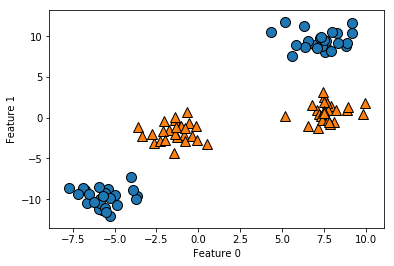

In [28]:
%matplotlib inline
import mglearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X,y = make_blobs(centers  = 4, random_state=8)
# print(y)
y = y % 2
# print(y)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

/home/minzhang/anaconda2/envs/ml/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0,0.5,'Feature 1')

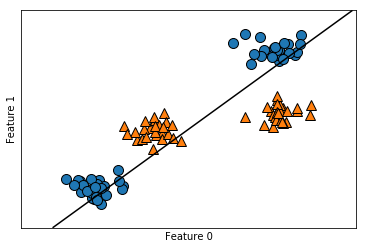

In [25]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)
# print(X)
mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')



Text(0.5,0,'feature1 **2')

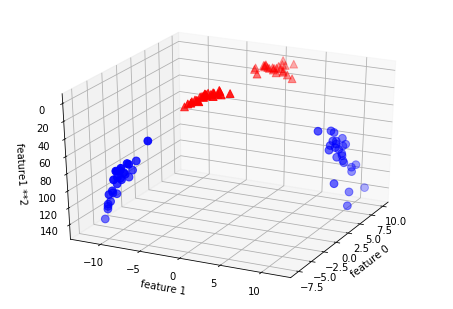

In [24]:
X_new = np.hstack([X, X[:,1:] **2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()

ax = Axes3D(figure, elev=-152, azim=-26)
mask=y == 0
# print(X_new.shape)
# print(mask)
# print(X_new[mask,0])
# print(X_new)
ax.scatter(X_new[mask, 0], X_new[mask,1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask,1], X_new[~mask, 2], c='r',marker = '^' ,cmap=mglearn.cm2, s=60)
ax.set_xlabel('feature 0')
ax.set_ylabel('feature 1')
ax.set_zlabel('feature1 **2')